In [1]:
# Import the dependencies.
# Module 6.1.4
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [5]:
# Import your Requests Library and the weather_api_key.
# Import the time library and the datetime module from the datetime library.
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
# Module 6.2.6
import requests
from config import weather_api_key
import time
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Module 6.2.6
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | oxbow
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | luganville
Processing Record 6 of Set 1 | gazanjyk
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | mareeba
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | lorengau
Processing Record 15 of Set 1 | tommot
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | waipawa
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | bela
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | new norfolk
Processing Record 23 of Set 1 | sa

City not found. Skipping...
Processing Record 41 of Set 4 | mut
Processing Record 42 of Set 4 | gorontalo
Processing Record 43 of Set 4 | ixtapa
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | moree
Processing Record 47 of Set 4 | longyearbyen
Processing Record 48 of Set 4 | odweyne
Processing Record 49 of Set 4 | ponta delgada
Processing Record 50 of Set 4 | asau
Processing Record 1 of Set 5 | los llanos de aridane
Processing Record 2 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 5 | lunenburg
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | leningradskiy
Processing Record 6 of Set 5 | lucena
Processing Record 7 of Set 5 | chuy
Processing Record 8 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 5 | abu jubayhah
City not found. Skipping...
Processing Record 10 of Set 5 | aklavik
Processing Record 11 of Set 5 | chunoyar
Processing Rec

Processing Record 27 of Set 8 | itacarambi
Processing Record 28 of Set 8 | wadi musa
Processing Record 29 of Set 8 | umm kaddadah
Processing Record 30 of Set 8 | hami
Processing Record 31 of Set 8 | lagoa
Processing Record 32 of Set 8 | tame
Processing Record 33 of Set 8 | bereda
Processing Record 34 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 35 of Set 8 | kuche
City not found. Skipping...
Processing Record 36 of Set 8 | bahir dar
Processing Record 37 of Set 8 | piacabucu
Processing Record 38 of Set 8 | hammonton
Processing Record 39 of Set 8 | ilula
Processing Record 40 of Set 8 | acapulco
Processing Record 41 of Set 8 | lichtenburg
Processing Record 42 of Set 8 | geraldton
Processing Record 43 of Set 8 | krasnoselkup
Processing Record 44 of Set 8 | bull savanna
Processing Record 45 of Set 8 | lipin bor
Processing Record 46 of Set 8 | tapaua
City not found. Skipping...
Processing Record 47 of Set 8 | colares
Processing Record 48 of Set 8 | padang
Processing R

Processing Record 11 of Set 12 | ambikapur
Processing Record 12 of Set 12 | naryan-mar
Processing Record 13 of Set 12 | lolua
City not found. Skipping...
Processing Record 14 of Set 12 | san carlos
Processing Record 15 of Set 12 | bandarbeyla
Processing Record 16 of Set 12 | lousa
Processing Record 17 of Set 12 | bridlington
Processing Record 18 of Set 12 | arman
Processing Record 19 of Set 12 | honningsvag
Processing Record 20 of Set 12 | vardo
Processing Record 21 of Set 12 | miles city
Processing Record 22 of Set 12 | griffith
Processing Record 23 of Set 12 | aflu
City not found. Skipping...
Processing Record 24 of Set 12 | mount gambier
Processing Record 25 of Set 12 | rio branco
Processing Record 26 of Set 12 | imbituba
Processing Record 27 of Set 12 | piopio
Processing Record 28 of Set 12 | akdepe
Processing Record 29 of Set 12 | mogadishu
Processing Record 30 of Set 12 | ilhabela
Processing Record 31 of Set 12 | rudnogorsk
Processing Record 32 of Set 12 | tudela
Processing Recor

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
# Module 6.2.7
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,-32.80,68,0,0.00,CA,2023-01-31 02:59:40
1,Oxbow,49.2333,-102.1676,-12.35,80,40,10.71,CA,2023-01-31 02:59:40
2,East London,-33.0153,27.9116,69.30,90,99,18.43,ZA,2023-01-31 02:59:40
3,Yellowknife,62.4560,-114.3525,-22.45,69,75,8.05,CA,2023-01-31 02:56:41
4,Luganville,-15.5333,167.1667,82.38,77,100,2.64,VU,2023-01-31 02:59:41
5,Gazanjyk,39.2446,55.5154,37.56,67,89,9.51,TM,2023-01-31 02:59:41
6,Mataura,-46.1927,168.8643,87.67,33,12,1.41,NZ,2023-01-31 02:59:41
7,Ponta Do Sol,32.6667,-17.1000,59.63,72,35,7.58,PT,2023-01-31 02:59:42
8,Port Alfred,-33.5906,26.8910,66.18,95,97,3.00,ZA,2023-01-31 02:59:42
9,Puerto Ayora,-0.7393,-90.3518,77.56,90,96,1.01,EC,2023-01-31 02:59:42


In [8]:
# Create the output file (CSV).
# Module 6.2.7
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
# Module 6.3.1
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

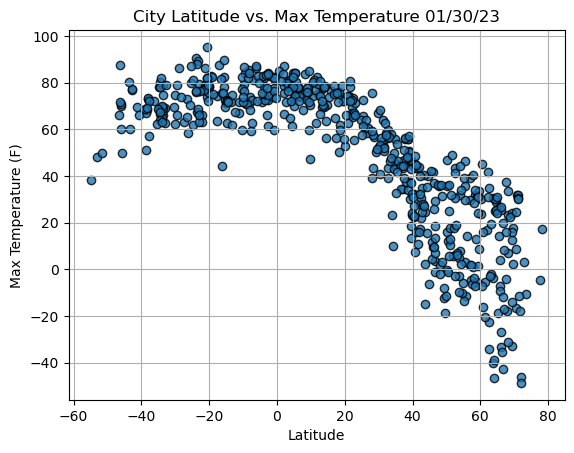

In [10]:
# Import time module
# Module 6.3.1
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


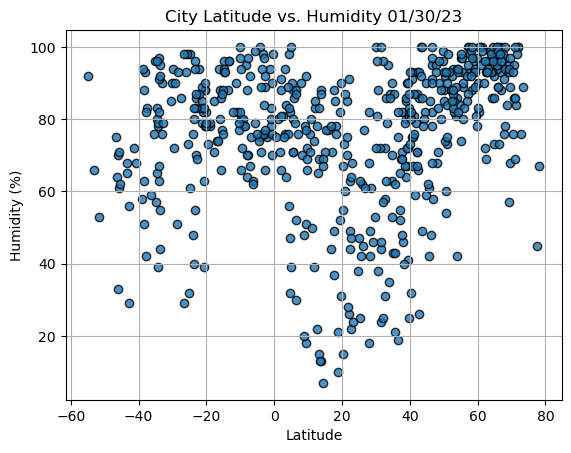

In [11]:
# Build the scatter plots for latitude vs. humidity.
# Module 6.3.2
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


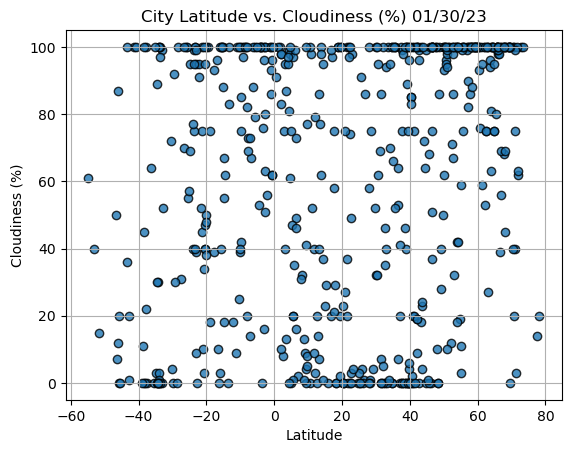

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
# Module 6.3.3
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

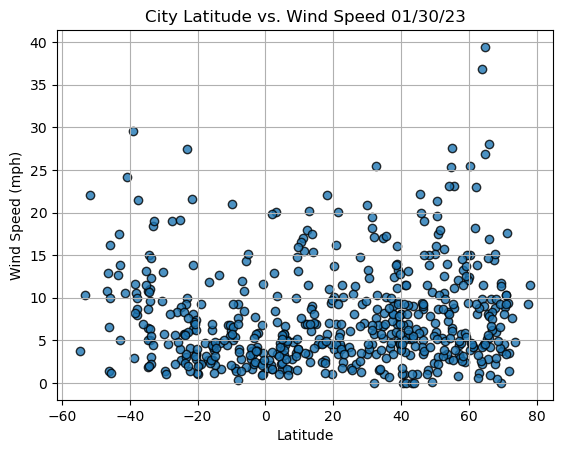

In [13]:
# Build the scatter plots for latitude vs. wind speed.
# Module 6.3.4
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
#Module 6.4.2
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                     Lorengau
Lat                       -2.0226
Lng                      147.2712
Max Temp                    83.08
Humidity                       75
Cloudiness                     56
Wind Speed                   5.84
Country                        PG
Date          2023-01-31 02:59:43
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
550     True
551    False
552     True
553     True
554    False
Name: Lat, Length: 555, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,-32.80,68,0,0.00,CA,2023-01-31 02:59:40
1,Oxbow,49.2333,-102.1676,-12.35,80,40,10.71,CA,2023-01-31 02:59:40
3,Yellowknife,62.4560,-114.3525,-22.45,69,75,8.05,CA,2023-01-31 02:56:41
5,Gazanjyk,39.2446,55.5154,37.56,67,89,9.51,TM,2023-01-31 02:59:41
7,Ponta Do Sol,32.6667,-17.1000,59.63,72,35,7.58,PT,2023-01-31 02:59:42


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
# Module 6.4.2
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

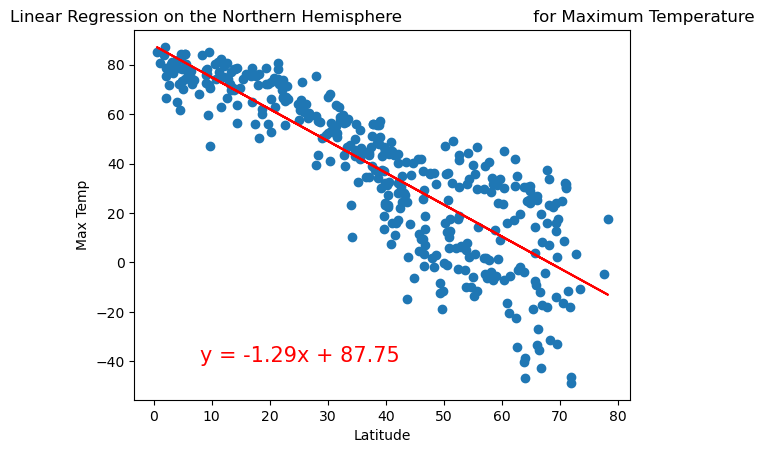

In [24]:
# Linear regression on the Northern Hemisphere
# Module 6.4.2
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(8,-40))

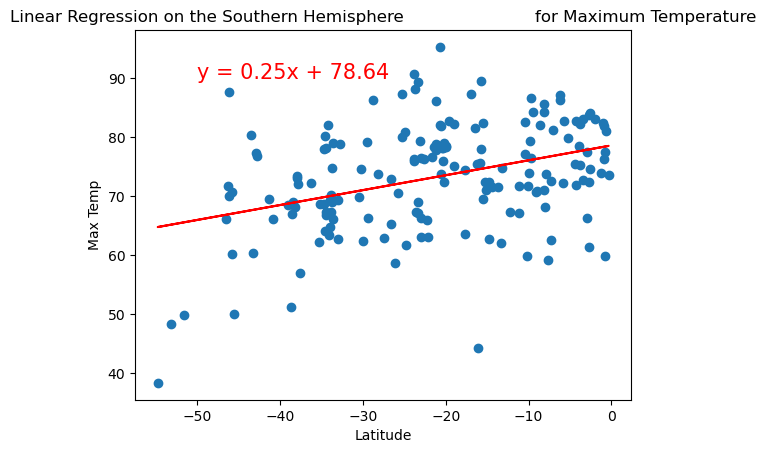

In [25]:
# Linear regression on the Southern Hemisphere
# Module 6.4.2
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

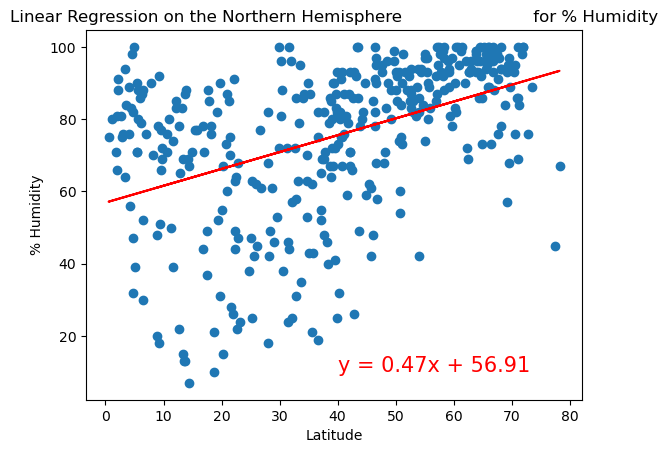

In [26]:
# Linear regression on the Northern Hemisphere
# Module 6.4.3
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


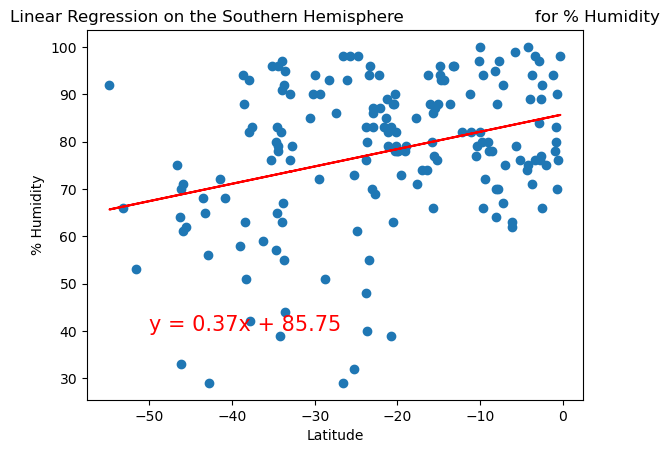

In [28]:
# Linear regression on the Southern Hemisphere
# Module 6.4.3
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,40))


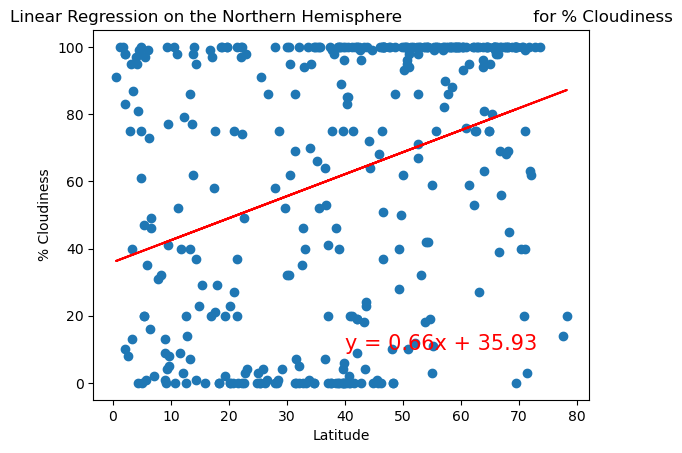

In [29]:
# Linear regression on the Southern Hemisphere
# Module 6.4.4
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

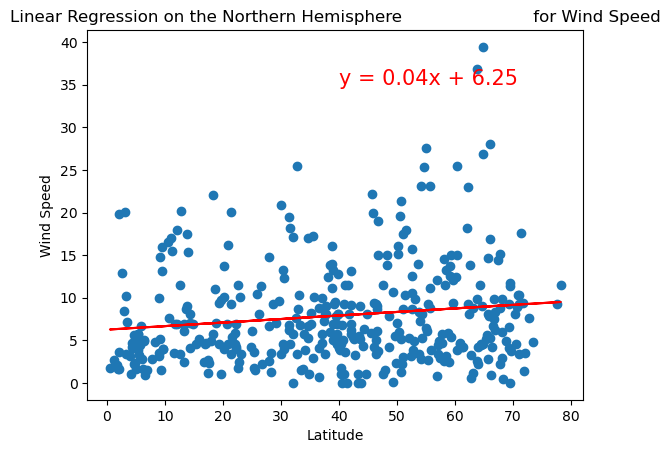

In [30]:
# Linear regression on the Northern Hemisphere
# Module 6.4.5
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

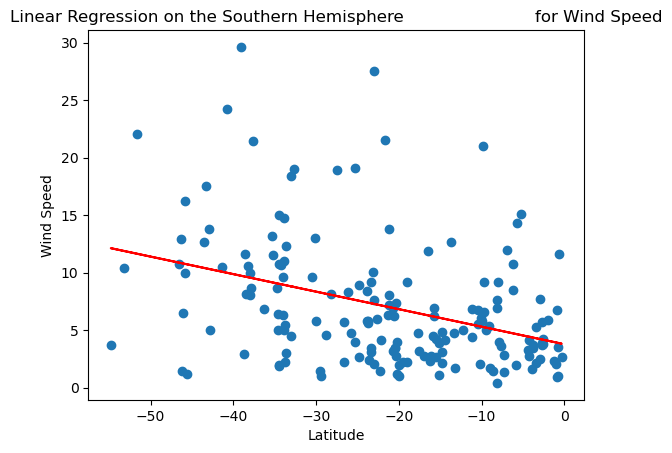

In [31]:
# Linear regression on the Southern Hemisphere
# Module 6.4.5
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
